In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('exams.csv')

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.describe()

 gender : 0.0%
 race/ethnicity : 0.0%
 parental level of education : 0.0%
 lunch : 0.0%
 test preparation course : 0.0%
 math score : 0.0%
 reading score : 0.0%
 writing score : 0.0%
Повторяющиеся строки : 
     gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  
Повторяющиеся строки : 
 Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


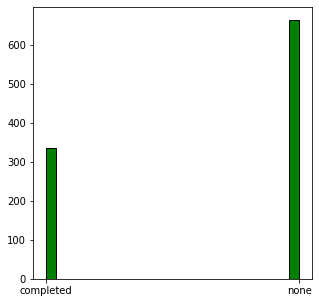

none         665
completed    335
Name: test preparation course, dtype: int64

In [3]:
data = pd.read_csv('exams.csv')
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(data['test preparation course'], edgecolor = 'black', color='green', bins=25)
plt.show()
data['test preparation course'].value_counts()

In [4]:
def preparingData():
  data = pd.read_csv('exams.csv')
  deletedIndex = 0
  for index, row in data.iterrows():
    if "none" in data['test preparation course'][index]:
      data.drop([index], inplace=True)
      deletedIndex=deletedIndex+1
    if deletedIndex==330:
      break
  return data

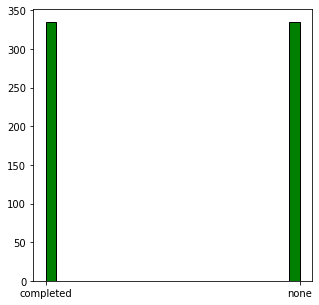

completed    335
none         335
Name: test preparation course, dtype: int64

In [5]:
w = preparingData()

fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(w['test preparation course'], edgecolor = 'black', color='green', bins=25)
plt.show()
w['test preparation course'].value_counts()

In [69]:
dataX = preparingData()
dataX.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis = 1, inplace=True)

dataX

,math score,reading score,writing score
0,67,67,63
4,78,73,68
7,93,88,84
10,99,83,85
11,80,87,90
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [7]:
dataY = preparingData()
dataY.drop(['gender', 'race/ethnicity','parental level of education','lunch', 'math score', 'reading score', 'writing score'], axis = 1, inplace=True)
dataY

dataY['test preparation course'].value_counts()

completed    335
none         335
Name: test preparation course, dtype: int64

In [9]:
time_start = time.time()
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size=0.8, shuffle=True, random_state=271)

model = LogisticRegression(random_state=271)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print ('Время логистической регрессии: ', time.time()-time_start)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Время логистической регрессии:  0.022562265396118164
(536, 3) (134, 3) (536, 1) (134, 1)


In [10]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

   completed       0.62      0.61      0.62        62
        none       0.67      0.68      0.68        72

    accuracy                           0.65       134
   macro avg       0.65      0.65      0.65       134
weighted avg       0.65      0.65      0.65       134



In [12]:
time_start = time.time()

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

print ('Время SVM: ', time.time()-time_start)

Время SVM:  4.613339900970459


In [13]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

svm_preds = best_model.predict(x_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

   completed       0.63      0.77      0.70        62
        none       0.76      0.61      0.68        72

    accuracy                           0.69       134
   macro avg       0.70      0.69      0.69       134
weighted avg       0.70      0.69      0.69       134



In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [15]:
time_start = time.time()

number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(x_train, y_train)

print ('Время KNN: ', time.time()-time_start)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(x_test)

print(classification_report(y_test, knn_preds))

Время KNN:  0.3581557273864746
0.6230337078651685
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

   completed       0.53      0.50      0.52        62
        none       0.59      0.62      0.61        72

    accuracy                           0.57       134
   macro avg       0.56      0.56      0.56       134
weighted avg       0.57      0.57      0.57       134



In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

dataX

,math score,reading score,writing score,Claster
0,67,67,63,0
4,78,73,68,0
7,93,88,84,0
10,99,83,85,0
11,80,87,90,0
...,...,...,...,...
995,73,70,65,0
996,85,91,92,0
997,32,35,41,-1
998,73,74,82,0


In [22]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(dataX)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(dataX, model.labels_))

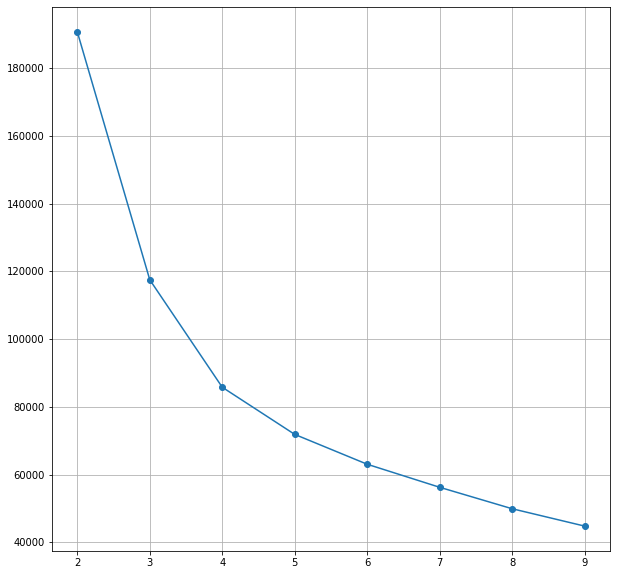

In [23]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker='o')
plt.show()

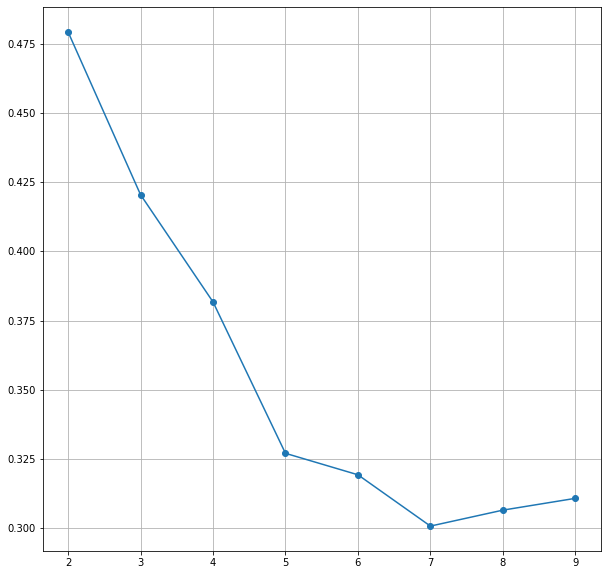

In [24]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker='o')
plt.show()

In [60]:
time_start_KMeans = time.time()
model1 = KMeans(n_clusters=2, random_state=123, init='k-means++')
model1.fit(dataX)
time_end_KMeans = time.time()-time_start_KMeans
model1.cluster_centers_

Время k-means:  0.03602004051208496


array([[55.2804878 , 58.49085366, 57.31402439, -0.50304878],
       [79.04385965, 81.61111111, 81.29532164, -0.67836257]])

In [26]:
labels = model1.labels_
dataX['Claster'] = labels

dataX['Claster'].value_counts()

1    342
0    328
Name: Claster, dtype: int64

In [27]:
fig = go.Figure(data=[go.Scatter3d(x=dataX['math score'], y=dataX['reading score'], z=dataX['writing score'], mode='markers', marker_color=dataX['Claster'], marker_size=4)])
fig.show()

In [68]:
time_start_AC = time.time()
model2 = AgglomerativeClustering(2, compute_distances=True)
clastering=model2.fit(dataX)
time_end_AC = time.time()-time_start_AC
dataX['Claster']=clastering.labels_

fig = go.Figure(data=[go.Scatter3d(x=dataX['math score'], y=dataX['reading score'], z=dataX['writing score'], mode='markers', marker_color=dataX['Claster'], marker_size=4)])
fig.show()

In [151]:
time_start_DBSCAN = time.time()
model3 = DBSCAN(eps=7, min_samples=7).fit(dataX)
time_end_DBSCAN = time.time()-time_start_DBSCAN
dataX['Claster'] = model3.labels_

fig = go.Figure(data=[go.Scatter3d(x=dataX['math score'], y=dataX['reading score'], z=dataX['writing score'], mode='markers', marker_color=dataX['Claster'], marker_size=4)])
fig.show()

In [67]:
print ('Время алгоритма k-means: ', time_end_KMeans)
print ('Время алгоритма иерархической кластеризации: ', time_end_AC)
print ('Время алгоритма DBSCAN: ', time_end_DBSCAN)

Время алгоритма k-means:  0.03602004051208496
Время алгоритма иерархической кластеризации:  0.02283644676208496
Время алгоритма DBSCAN:  0.013957023620605469
